<a href="https://colab.research.google.com/github/dev02chandan/computer_vision/blob/main/Canny_Morpological_Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aim:

Apply Canny edge detection algorithm to highlight edges in the given image.

Apply morphology operations on image to suit the requirement of object detection.

Alter the parameters and conclude the results


### Import Images

In [113]:
import cv2
img1 = cv2.imread('cellphone.JPG', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('fruits.png', cv2.IMREAD_GRAYSCALE)

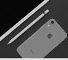

In [114]:
from google.colab.patches import cv2_imshow
cv2_imshow(img1)

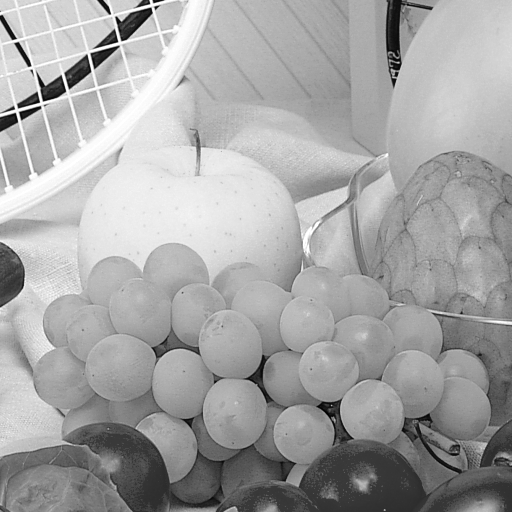

In [115]:
cv2_imshow(img2)

### Apply Canny Edge Detection

In [116]:
edg1 = cv2.Canny(img1, 98, 100)

In [117]:
edg2 = cv2.Canny(img2, 98, 100)

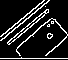

In [118]:
cv2_imshow(edg1)

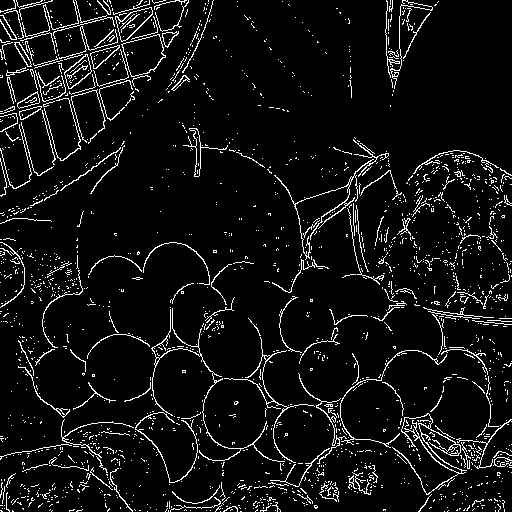

In [119]:
cv2_imshow(edg2)

### Contours

In [120]:
con1, _ = cv2.findContours(edg1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [121]:
len(con1)

9

In [122]:
con2, _ = cv2.findContours(edg2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [123]:
len(con2)

1864

In [124]:
con2[0]

array([[[444, 511]]], dtype=int32)

In [125]:
contour_image1 = cv2.imread('cellphone.JPG')

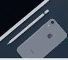

In [126]:
cv2_imshow(contour_image1)

In [127]:
contour_image2 = cv2.imread('fruits.png')

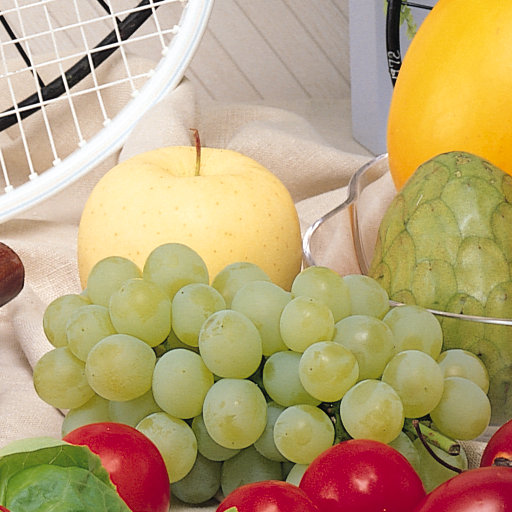

In [128]:
cv2_imshow(contour_image2)

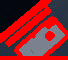

In [129]:
# drawContours(original_image_copy, contour_image, -1 for drawing all contours, colour of the contour, thickness of the line)
cv2.drawContours(contour_image1, con1, -1, (0, 0, 255), 3)
cv2_imshow(contour_image1)

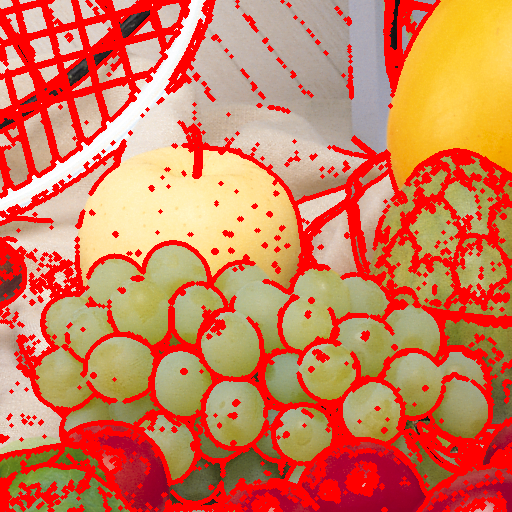

In [130]:
cv2.drawContours(contour_image2, con2, -1, ( 0, 0, 255), 3)
cv2_imshow(contour_image2)

In [131]:
# The contours are not continuous - let's use Morphological Operations

### Morphological Operations

In [132]:
# Erosion - removes the noisy pixels but also the required edges
# Dilation - regains the original edges which is lost during erosion

In [133]:
se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

In [134]:
# Dilation
img_dilated1 = cv2.dilate(edg1, se, iterations=1)
img_dilated2 = cv2.dilate(edg2, se, iterations=1)

In [135]:
# Erosion
img_eroded1 = cv2.erode(img_dilated1, se, iterations=1)
img_eroded2 = cv2.erode(img_dilated2, se, iterations=1)

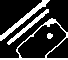

In [136]:
cv2_imshow(img_eroded1)

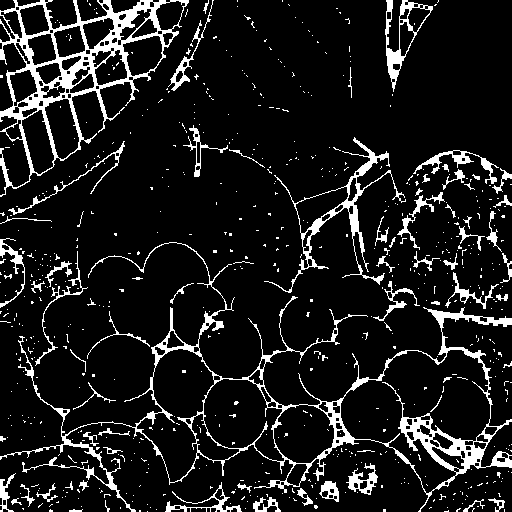

In [137]:
cv2_imshow(img_eroded2)

In [138]:
con1_morph, _ = cv2.findContours(img_eroded1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
con2_morph, _ = cv2.findContours(img_eroded2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
org_img1 = cv2.imread('cellphone.JPG')
org_img2 = cv2.imread('fruits.png')

cv2.drawContours(org_img1, con1_morph, -1, (0, 0, 255), 3)

cv2.drawContours(org_img2, con2_morph, -1, ( 0, 0, 255), 3)

array([[[197, 211, 224],
        [198, 213, 230],
        [206, 213, 223],
        ...,
        [ 46, 205, 254],
        [ 47, 207, 254],
        [ 35, 202, 252]],

       [[201, 216, 229],
        [201, 213, 225],
        [203, 213, 224],
        ...,
        [ 42, 204, 251],
        [ 42, 202, 251],
        [ 49, 205, 254]],

       [[203, 212, 226],
        [200, 211, 225],
        [202, 211, 223],
        ...,
        [ 32, 202, 252],
        [ 47, 201, 253],
        [ 54, 208, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [ 47,   0, 151],
        [ 43,   0, 149],
        [ 43,   0, 152]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [ 48,   0, 150],
        [ 45,   0, 150],
        [ 41,   0, 148]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [ 42,   0, 150],
        [ 45,   0, 149],
        [ 44,   0, 146]]

In [139]:
len(con1_morph)

3

In [140]:
len(con2_morph)

599

In [141]:
import matplotlib.pyplot as plt

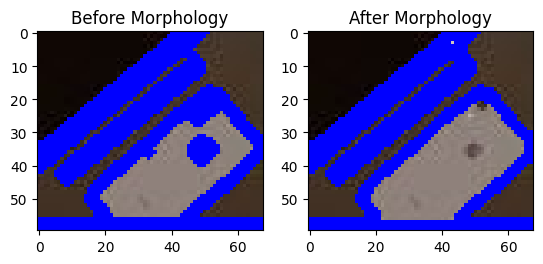

In [142]:
plt.subplot(1,2,1)
plt.imshow(contour_image1)
plt.title("Before Morphology")

plt.subplot(1,2,2)
plt.title("After Morphology")
plt.imshow(org_img1)

Text(0.5, 1.0, 'After Morphology')

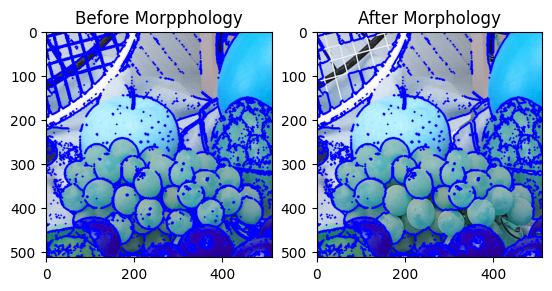

In [143]:
plt.subplot(1,2,1)
plt.imshow(contour_image2)
plt.title("Before Morpphology")

plt.subplot(1,2,2)
plt.imshow(org_img2)
plt.title("After Morphology")

### Create a Function

In [144]:
import cv2
import matplotlib.pyplot as plt

def Compare(image_path,
            canny_limits,
            chain_approx_simple,
            thickness_contour,
            colour_contour,
            opening,
            size_of_kernel,
            erosion_iter,
            dilation_iter
            ):
    """
    Compare function to analyze the effects of Canny edge detection and morphological operations on an input image.

    Parameters:
        image_path (str): Path to the input image file.
        canny_limits (tuple): Tuple containing lower and upper thresholds for Canny edge detection.
        chain_approx_simple (bool): Boolean flag indicating whether to use simple approximation for contour detection.
        thickness_contour (int): Thickness of the contours to draw on the images.
        colour_contour (tuple): Tuple representing the color (BGR format) for drawing the contours.
        opening (bool): Boolean flag indicating whether to perform the opening operation.
        size_of_kernel (tuple): Tuple representing the size of the structuring element (kernel) for morphological operations.
        erosion_iter (int): Number of iterations for the erosion operation.
        dilation_iter (int): Number of iterations for the dilation operation.

    Returns:
        None (Displays the original image and images with contours before and after morphological operations).

    """
    # Read the input image as grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Before Morphology Image with contours
    img_copy = cv2.imread(image_path)

    # After Morphology Image with contours
    img_copy1 = cv2.imread(image_path)

    # Edge Detection using Canny algorithm
    edg = cv2.Canny(img, canny_limits[0], canny_limits[1])

    # Simple or no Approximation of points to mark edges
    if chain_approx_simple:
        con, _ = cv2.findContours(edg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    else:
        con, _ = cv2.findContours(edg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Draw contours on the image with Canny edges
    cv2.drawContours(img_copy, con, -1, colour_contour, thickness_contour)

    # Create a structuring element for morphological operations
    se = cv2.getStructuringElement(cv2.MORPH_RECT, size_of_kernel)

    # Morphological Operations
    if opening:
        # Perform erosion followed by dilation (Opening)
        img_eroded = cv2.erode(edg, se, iterations=erosion_iter)
        img_dilated = cv2.dilate(img_eroded, se, iterations=dilation_iter)
        morph_img = img_dilated
    else:
        # Perform dilation followed by erosion (Closing)
        img_dilated = cv2.dilate(edg, se, iterations=dilation_iter)
        img_eroded = cv2.erode(img_dilated, se, iterations=erosion_iter)
        morph_img = img_eroded

    # Detect contours after morphological operations
    if chain_approx_simple:
        con_morph, _ = cv2.findContours(morph_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    else:
        con_morph, _ = cv2.findContours(morph_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    # Draw contours on the image after morphological operations
    cv2.drawContours(img_copy1, con_morph, -1, colour_contour, thickness_contour)

    # Printing the parameters for the analysis
    print("Canny Limits: ", canny_limits)
    print("Simple Approx for Finding contours: ", chain_approx_simple)
    print("Opening: " , opening)
    print("Size of Kernel: ", size_of_kernel)
    print("Erosion Iterations: ", erosion_iter)
    print("Dilation Iterations: ", dilation_iter)
    print("Results: ")

    # Convert BGR images to RGB format for plotting with Matplotlib
    img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
    img_copy1 = cv2.cvtColor(img_copy1, cv2.COLOR_BGR2RGB)

    # Plotting the Images
    plt.figure(figsize=(10, 15))
    plt.subplot(1,3,1)
    plt.title("Original Image")
    plt.imshow(img, cmap='gray')

    plt.subplot(1,3,2)
    plt.title("Before Morphology Contours")
    plt.imshow(img_copy)

    plt.subplot(1,3,3)
    plt.title("After Morphology Contours")
    plt.imshow(img_copy1)

    plt.show()


Canny Limits:  (98, 100)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


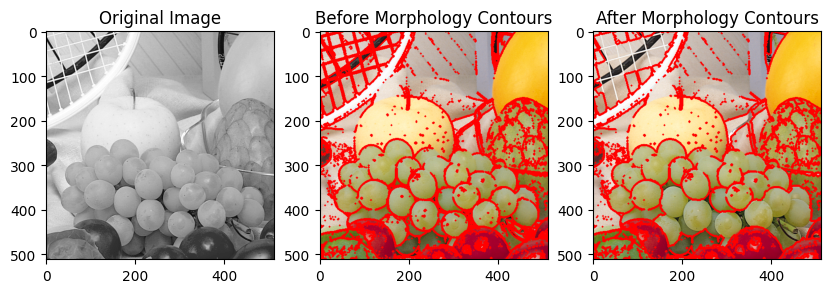

In [145]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (98,100),
    chain_approx_simple = True,
    thickness_contour = 3,
    colour_contour = (0, 0, 255), # Red
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

### Testing

#### Testing Canny Limits

Canny Limits:  (98, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


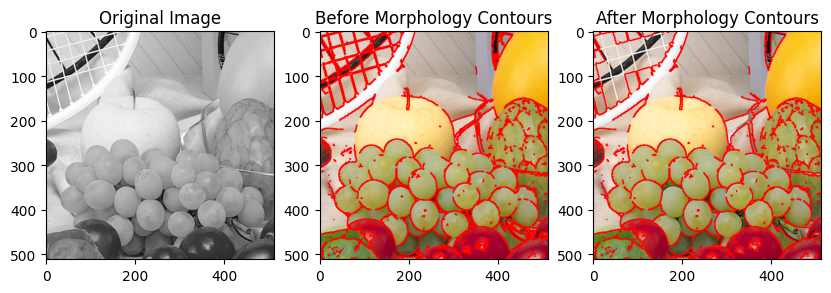

In [146]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (98,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 0, 255), # Red
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

Canny Limits:  (50, 100)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


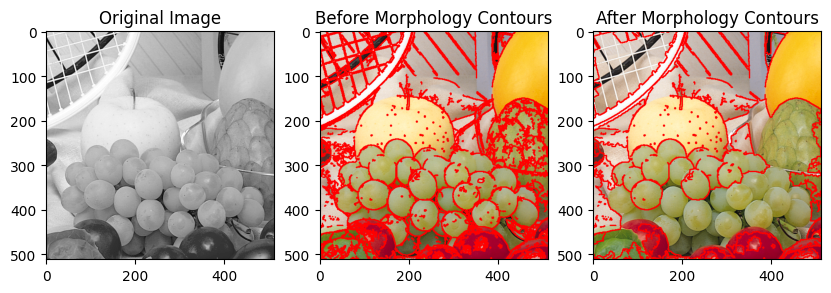

In [147]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (50,100),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 0, 255), # Red
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

Canny Limits:  (10, 100)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


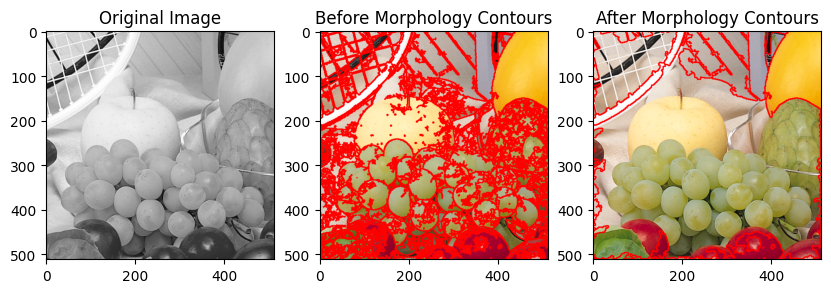

In [148]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (10,100),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 0, 255), # Red
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

Canny Limits:  (50, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


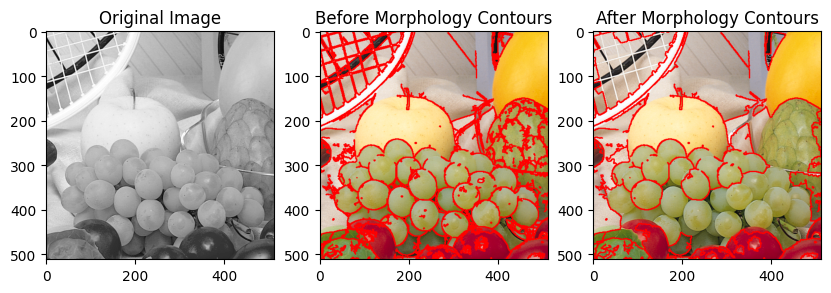

In [149]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (50,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 0, 255), # Red
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


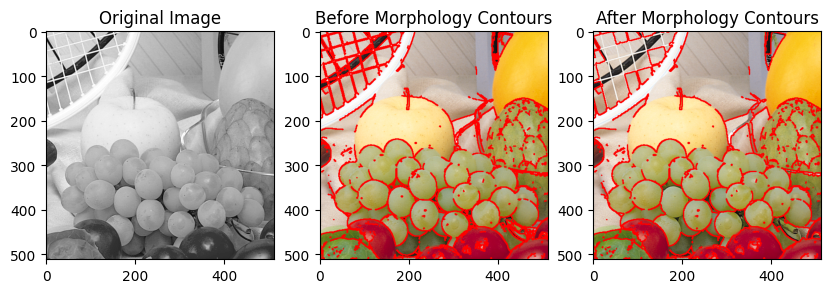

In [150]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 0, 255), # Red
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

As we increase the upper limit - lesser number of edges are detected.

As we reduce the lower limit - more number of edges are detected.

#### Change Chain_approx_simple

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


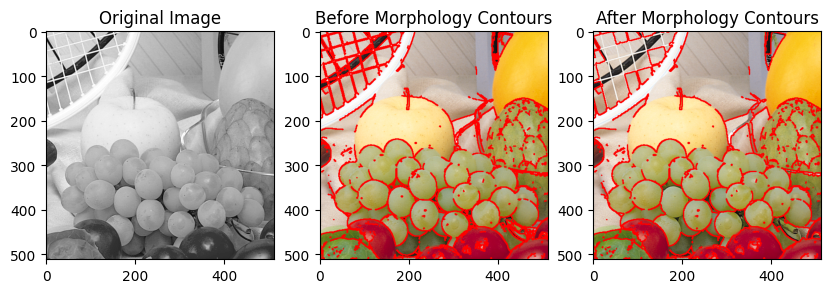

In [151]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 0, 255), # Red
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  False
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


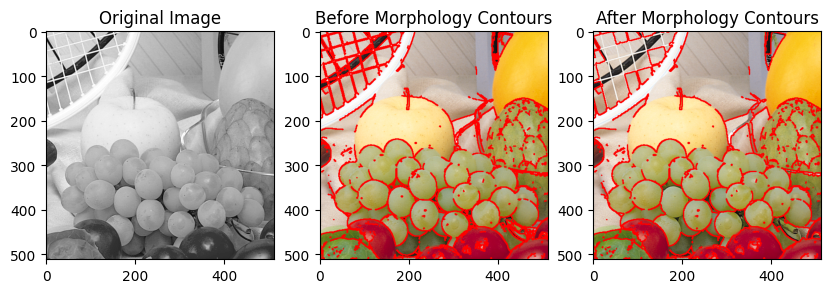

In [152]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = False,
    thickness_contour = 2,
    colour_contour = (0, 0, 255), # Red
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

Not much visible difference, but for certain images where there are very minute curves - the points marked in detail without approximation give better results

#### Changing Thickness of contours and Colour

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


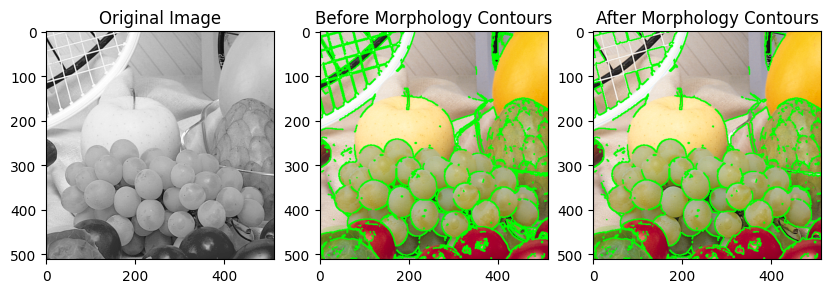

In [153]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 255, 0),
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


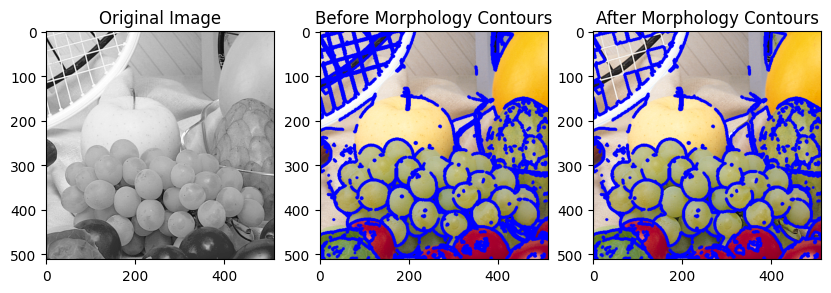

In [154]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 5,
    colour_contour = (255, 0, 0),
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


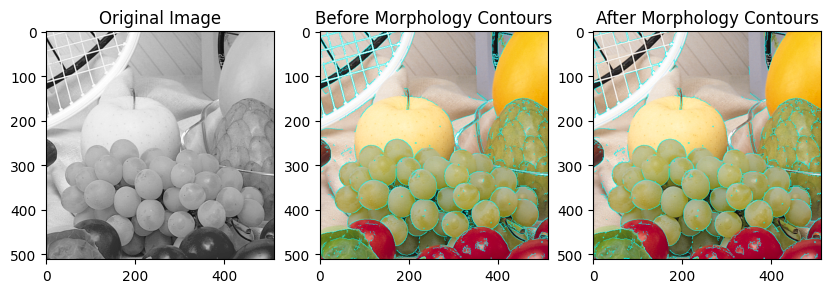

In [155]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 1,
    colour_contour = (255, 255, 0),
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

These parameters don't affect the results but are mainly for the visual presentation of the image.

#### Opening and Closing

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  True
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


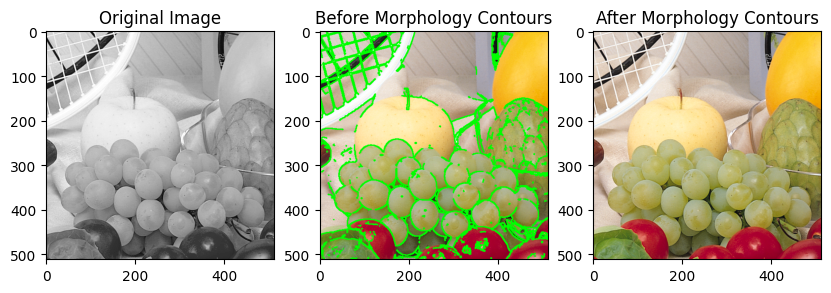

In [156]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 255, 0),
    opening = True,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


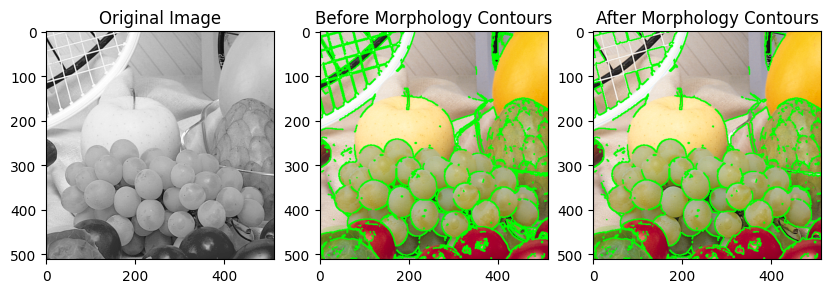

In [157]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 255, 0),
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

When we perform Erosion before Dilation in Opening all the edges detected (which are very thin lines) disappear and hence the output is the same as the original Image.

#### Change Kernel Size

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


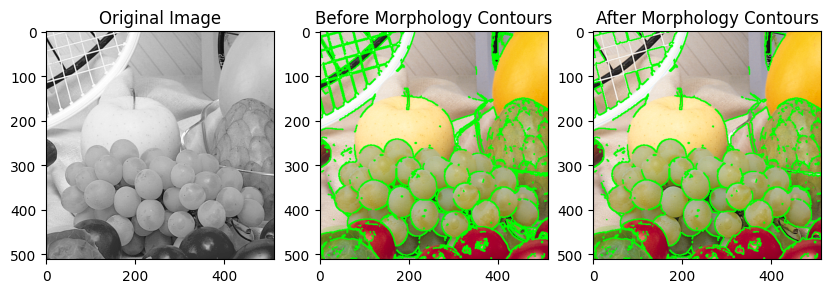

In [158]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 255, 0),
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (5, 5)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


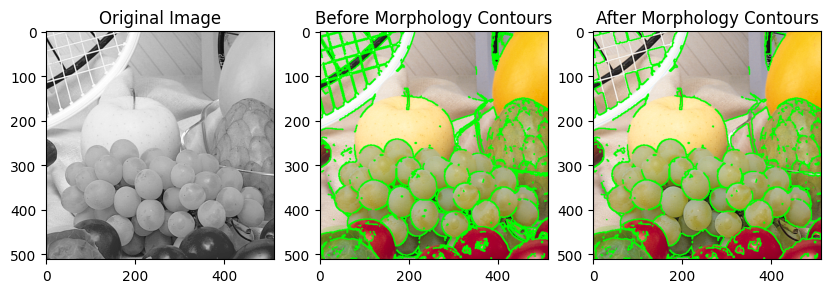

In [159]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 255, 0),
    opening = False,
    size_of_kernel = (5,5),
    erosion_iter = 1,
    dilation_iter = 1
    )

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (7, 7)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


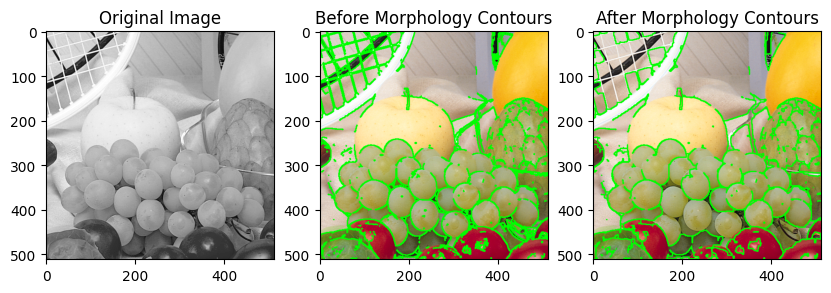

In [160]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 255, 0),
    opening = False,
    size_of_kernel = (7,7),
    erosion_iter = 1,
    dilation_iter = 1
    )

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (9, 9)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


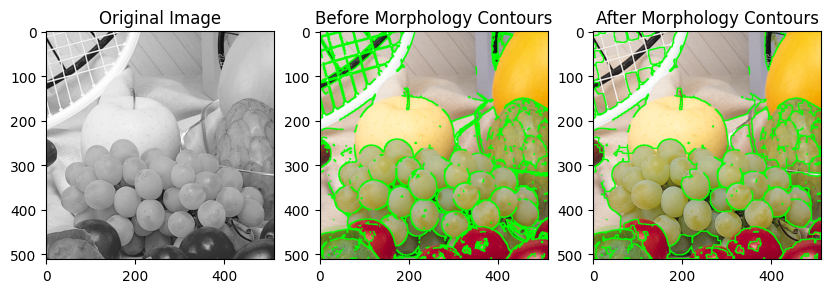

In [161]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 255, 0),
    opening = False,
    size_of_kernel = (9,9),
    erosion_iter = 1,
    dilation_iter = 1
    )

As the Kernel size increases, the number of finer edges detected reduce.

#### Changing Erosion and Dilation Iterations

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


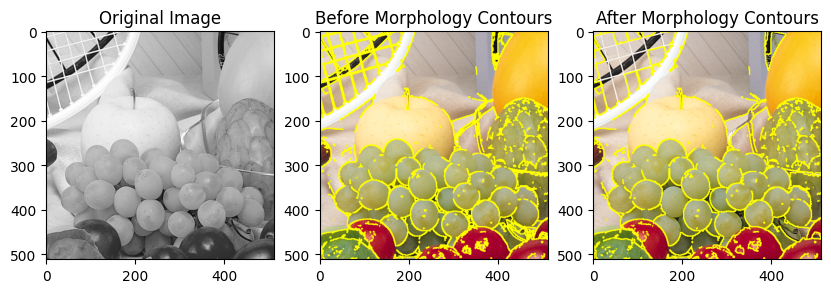

In [162]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 255, 255),
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  2
Dilation Iterations:  2
Results: 


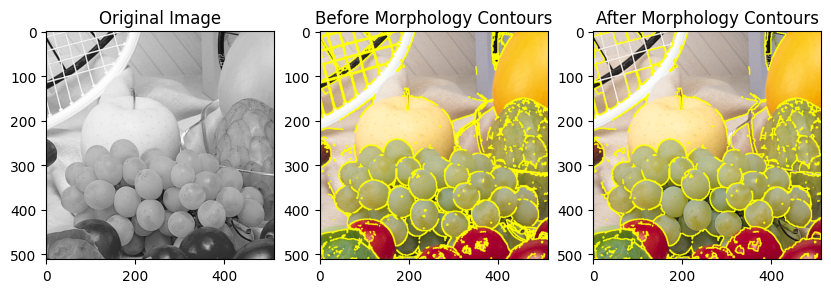

In [163]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 255, 255),
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 2,
    dilation_iter = 2
    )

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  2
Results: 


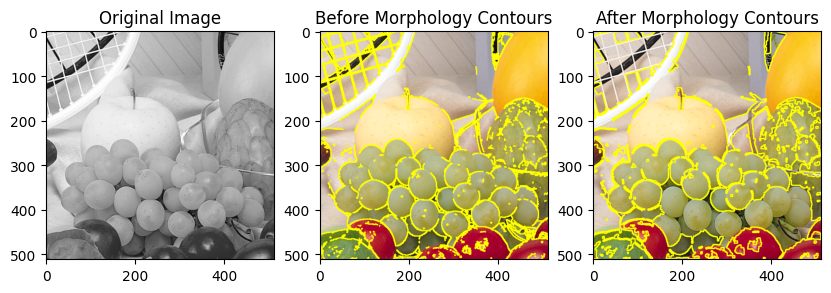

In [164]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 255, 255),
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 2
    )

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  2
Dilation Iterations:  1
Results: 


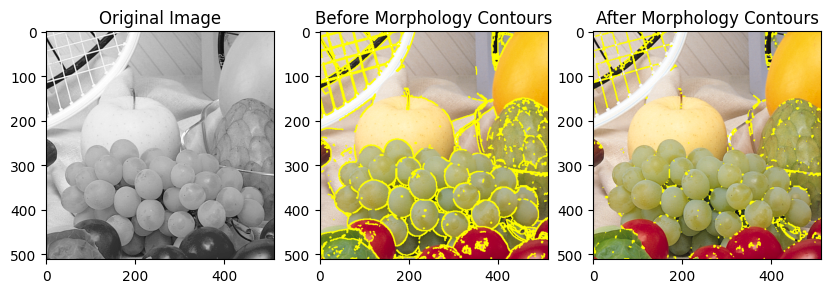

In [165]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 255, 255),
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 2,
    dilation_iter = 1
    )

More Erosion Removes the edges, More dilation thickens the edges - but can tend to miss some edges.
1,1 was the best value for iterations of erosion and dilation

### Final Result

Canny Limits:  (100, 150)
Simple Approx for Finding contours:  True
Opening:  False
Size of Kernel:  (3, 3)
Erosion Iterations:  1
Dilation Iterations:  1
Results: 


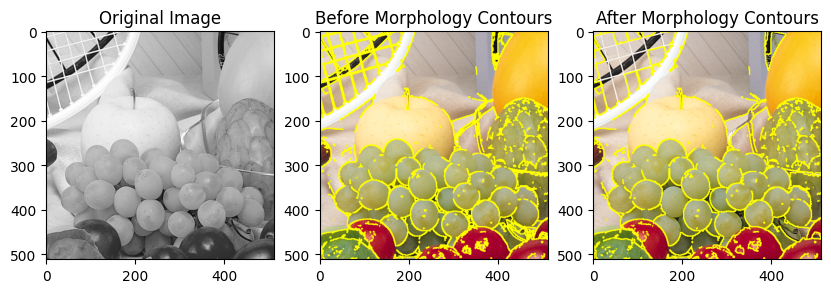

In [166]:
Compare(
    image_path = '/content/fruits.png',
    canny_limits = (100,150),
    chain_approx_simple = True,
    thickness_contour = 2,
    colour_contour = (0, 255, 255),
    opening = False,
    size_of_kernel = (3,3),
    erosion_iter = 1,
    dilation_iter = 1
    )

# Conclusion

During the experimentation with Canny edge detection and morphological operations for object detection, the following observations and results were obtained:

1. **Canny Edge Detection:**
   - Lower Threshold Adjustment: Reducing the lower threshold while keeping the upper threshold constant resulted in detecting more edges. Lowering the lower threshold allows weaker edges to be included in the result, leading to more edges being detected.
   - Upper Threshold Adjustment: Increasing the upper threshold while keeping the lower threshold constant resulted in detecting fewer edges. Raising the upper threshold filters out weaker edges, resulting in a reduction in the number of detected edges.
   - Contour Approximation: Disabling simple approximation (`cv2.CHAIN_APPROX_NONE`) provided more points and more accurate contours during contour detection. This is because `cv2.CHAIN_APPROX_NONE` preserves all contour points without compression, resulting in higher accuracy.

2. **Morphological Operations:**
   - Dilation: Dilation was effectively used to fill the gaps between edge points detected using the Canny edge detection algorithm. This operation enlarged the edges and connected broken segments, making the edges more continuous.
   - Controlling Edge Thickness: By adjusting the number of iterations during dilation, the thickness of the edges could be increased. More iterations of dilation result in thicker edges, which can be beneficial for certain object detection tasks.
   - Edge Refinement: Following dilation with a number of iterations of erosion allowed control over the thickness of the edges. This step effectively refined the edges, especially when dealing with thin or noisy edges, to suit the specific requirements of the application.

3. **Combining Morphology and Contour Detection:**
   - Morphological operations followed by contour detection provided better quality edges. The combination of these techniques enhanced the edge detection process, resulting in more accurate and refined edge boundaries.

Overall, the experimentation showed that carefully adjusting the parameters in Canny edge detection and morphological operations can significantly impact the quality and quantity of detected edges. By combining these techniques, it is possible to achieve better object detection results with greater control over edge thickness and refinement.
